# **Lottery Analysis**
This notebook consist of a three-part analysis on the dataset obtained from the past decades lottery draws of the various lotteries conducted by PCSO (Philippine Charity Sweepstakes Office).
* Part 1: Lottery Results Distribution Analysis (6/42, 6/45, 6/49, 6/55, 6/58)
* Part 2: Analysis of the Effects of Bets Count on Draw Counts (EZ2)
* Part 3: Winners / Winnings Descriptive Statistics

#### Progress
* 5/14/24 - Initial Part 1, Part 3

## **Part 1: Lottery Results Distribution Analysis (6/42, 6/45, 6/49, 6/55, 6/58)**
In a lottery, a participant (or bettor) plays by selecting a number that all have same probabilities of getting drawn, which means that the numbers will follow a uniform distribution in a hypothetical infinite amount of draws. 

In this section, the distribution of drawn numbers during the past decade (2014-2024) for the different lotto game categories (6/42, 6/45, 6/49, 6/55, 6/58) by PCSO will be presented. 

Using a statistical test, it will be verified whether the draws distribution deviates from the expected uniform distribution (to which if true would imply "unfairness").

In [3]:
import read 
from matplotlib import pyplot as plt
from scipy.stats import ks_2samp
import pandas as pd
import pandasql as ps

In [4]:
DATA_URL = 'drawresults.htm'

df = read.getData(DATA_URL)

In [5]:
df[0:5] # First 5 rows

,LOTTO GAME,COMBINATIONS,DRAW DATE,JACKPOT (PHP),WINNERS
0,Grand Lotto 6/55,"[46, 1, 6, 40, 27, 35]",2024-04-20,29700000.0,0
1,Lotto 6/42,"[26, 39, 40, 31, 29, 14]",2024-04-20,17325372.2,0
2,6D Lotto,"[8, 7, 7, 6, 0, 2]",2024-04-20,2159727.0,1
3,3D Lotto 2PM,"[5, 9, 7]",2024-04-20,4500.0,201
4,3D Lotto 5PM,"[1, 4, 2]",2024-04-20,4500.0,137


In [6]:
df['LOTTO GAME'].value_counts(ascending=False)

LOTTO GAME
3D Lotto 2PM        3549
2D Lotto 2PM        3549
3D Lotto 5PM        3548
3D Lotto 9PM        3548
2D Lotto 5PM        3548
2D Lotto 9PM        3548
Grand Lotto 6/55    1541
Megalotto 6/45      1539
Lotto 6/42          1535
Superlotto 6/49     1530
4D Lotto            1475
6D Lotto            1469
Ultra Lotto 6/58    1254
Name: count, dtype: int64

In [7]:
# Obtained pooled drawn numbers
numbers42 = read.poolCombination(df[df['LOTTO GAME'] == 'Lotto 6/42']['COMBINATIONS'])
numbers45 = read.poolCombination(df[df['LOTTO GAME'] == 'Megalotto 6/45']['COMBINATIONS'])
numbers49 = read.poolCombination(df[df['LOTTO GAME'] == 'Superlotto 6/49']['COMBINATIONS'])
numbers55 = read.poolCombination(df[df['LOTTO GAME'] == 'Grand Lotto 6/55']['COMBINATIONS'])
numbers58 = read.poolCombination(df[df['LOTTO GAME'] == 'Ultra Lotto 6/58']['COMBINATIONS'])

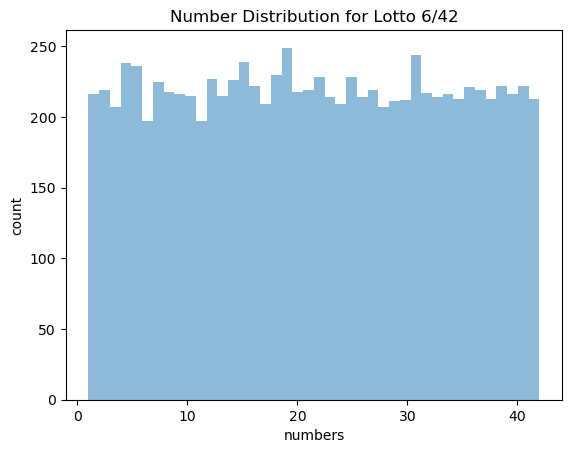

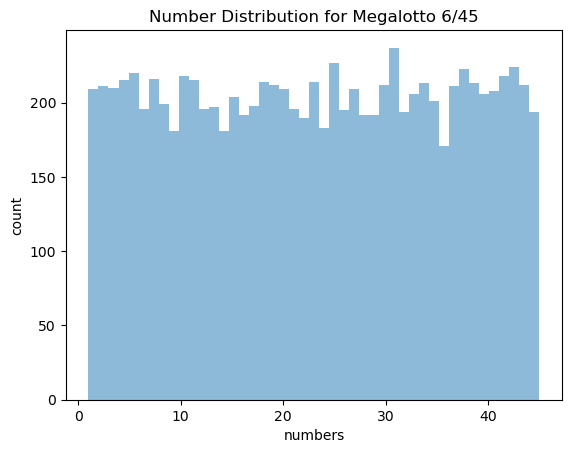

In [8]:
# Plot distribution 6/42, 6/45
read.createHist(numbers42, 42, 'Lotto 6/42')
read.createHist(numbers45, 45, 'Megalotto 6/45')

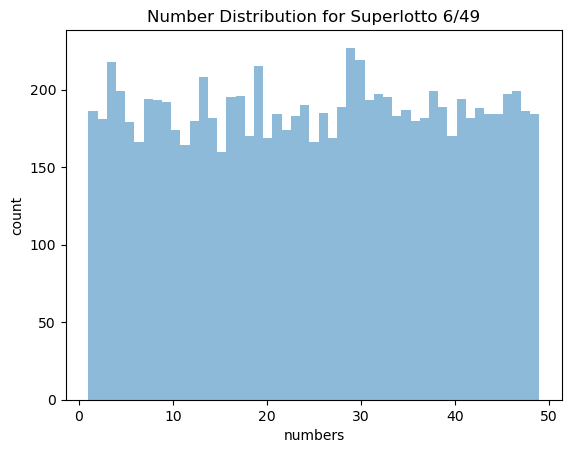

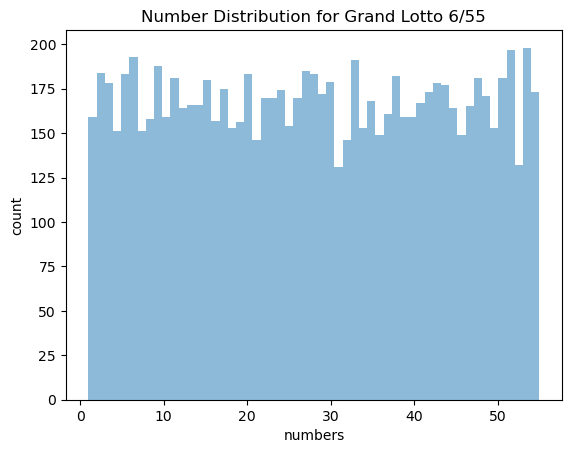

In [9]:
# Plot distribution 6/49, 6/55
read.createHist(numbers49, 49, 'Superlotto 6/49')
read.createHist(numbers55, 55, 'Grand Lotto 6/55')

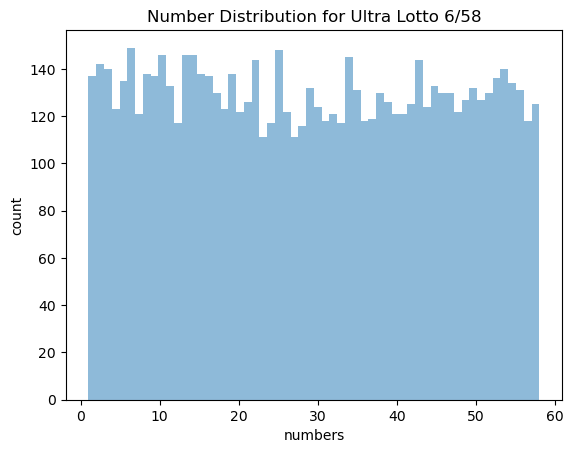

In [10]:
# Plot distribution 6/58
read.createHist(numbers58, 58, 'Ultra Lotto 6/58')

In [11]:
# Create uniform dataset for 6/55
numbers55uniform = read.createUniformData(numbers55, 55)

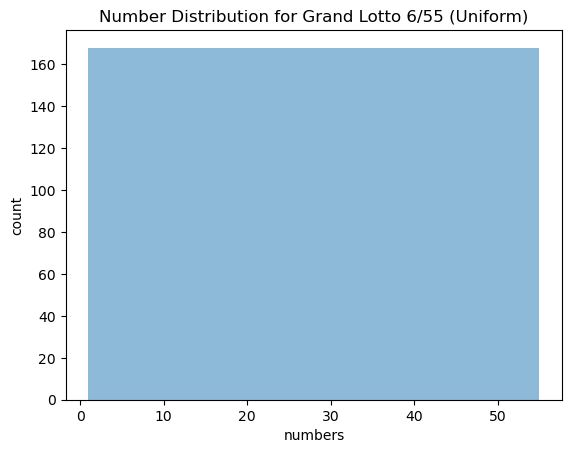

In [12]:
# Plot hypothetical uniform 6/55 distribution
read.createHist(numbers55uniform, 55, 'Grand Lotto 6/55 (Uniform)')

In [13]:
# Perform Kolmogorov-Smirnov test

"""
This test is used to compare 2 distributions if they come from the same underlying distribution.
Test statistic: max value of the difference between dataset A and B's CDF

Null hypothesis: both dataset come from the same distribution
"""

ksr55 = ks_2samp(numbers55uniform, numbers55)

print(f"Tstatistic: {ksr55[0]}")
print(f"P-value: {ksr55[1]}")

Tstatistic: 0.004837472715474013
P-value: 0.9998924157943627


## Test Interpretation (for 6/55)
Since the test statistic is small implying little deviation from the theoreticcal distribution (p value is close to 1), using a level of significance of .05 *(probability of rejecting a true null hypothesis / Type 1 Error)* we cannot reject the null hypothesis. Also, since the pvalue is very close to 1, it suggests that the two dataset is likely from the same distribution and any difference is just due to chance / randomness.

In [15]:
# Testing for other lottery types

# Creating uniform dataset
numbers42uniform = read.createUniformData(numbers42, 42)
numbers45uniform = read.createUniformData(numbers45, 45)
numbers49uniform = read.createUniformData(numbers49, 49)
numbers58uniform = read.createUniformData(numbers58, 58)

# Perform Kolmogorov-Smirnov test
ksr42 = ks_2samp(numbers42uniform, numbers42)
ksr45 = ks_2samp(numbers45uniform, numbers45)
ksr49 = ks_2samp(numbers49uniform, numbers49)
ksr58 = ks_2samp(numbers58uniform, numbers58)

In [16]:
# Tabulating Kolmogorov-Smirnov test results
lotteryTypes = ['Lotto 6/42','Megalotto 6/45','Superlotto 6/49','Grand Lotto 6/55','Ultra Lotto 6/58']
tstats = [ksr42[0], ksr45[0], ksr49[0], ksr55[0], ksr58[0]]
pvals = [ksr42[1], ksr45[1], ksr49[1], ksr55[1], ksr58[1]]

dict = {'type': lotteryTypes, 'tstatistic': tstats, 'p-value': pvals}
table = pd.DataFrame(dict)

table

,type,tstatistic,p-value
0,Lotto 6/42,0.004529,0.999977
1,Megalotto 6/45,0.006736,0.983565
2,Superlotto 6/49,0.009408,0.806255
3,Grand Lotto 6/55,0.004837,0.999892
4,Ultra Lotto 6/58,0.015161,0.347082


## Test Interpretation (Overall)
None of the lottery type is found to have a p-value less than .05, which means that we could not reject the null hypothesis that the dataset comes from a uniform distribution. We therefore cannot conclude that the lottery results deviate from the expected uniform distribution (no signs of unfairness).

## **Part 2: Analysis of the Effects of Bets Count on Draw Counts (EZ2)**
In this section, the distribution of draw counts as it relates to the number of bets will be investigated.

## **Part 3: Winners / Winnings Descriptive Statistics**
In this section, some questions pertaining to winners and winnings will be answered.

In [20]:
# Preprocessing for SQL queries in Part 3

# Renaming Jackpot (for simpler querying)
df.rename(columns = {'JACKPOT (PHP)':'JACKPOT'}, inplace = True)

# Drop 'COMBINATIONS' column to avoid pandaSQL querying error (List is an unsupported type)
df = df.drop(['COMBINATIONS'], axis=1) 

# Convert winners to floating (for operations in SQL queries)
df['WINNERS'] = df['WINNERS'].astype(float)

### **Q1: How many total winners (per Lotto Type)?**

In [21]:
# How many total winners (per Lotto Type)
query = """SELECT [LOTTO GAME], CAST(SUM(WINNERS) AS INT) AS 'TOTAL WINNERS' FROM df 
         GROUP BY [LOTTO GAME] """
df1 = ps.sqldf(query,locals())
df1

,LOTTO GAME,TOTAL WINNERS
0,2D Lotto 2PM,702342
1,2D Lotto 5PM,616019
2,2D Lotto 9PM,1455648
3,3D Lotto 2PM,1562884
4,3D Lotto 5PM,1411507
5,3D Lotto 9PM,2178902
6,4D Lotto,44636
7,6D Lotto,244
8,Grand Lotto 6/55,507
9,Lotto 6/42,229


### **Q2: How many winners per game (per Lotto Type)?**

In [22]:
# How many winners per game (per Lotto Type)

# SubQuery: How many total winners (per Lotto Type) - same query as previous cell (but without casting SUM as INT)
query1 = """SELECT [LOTTO GAME], SUM(WINNERS) AS 'TOTAL WINNERS' FROM df 
            GROUP BY [LOTTO GAME] """
# SubQuery: How many total game (per Lotto Type) - same as previous
query2 = """ SELECT [LOTTO GAME], COUNT([LOTTO GAME]) AS 'TOTAL GAMES' FROM df 
            GROUP BY [LOTTO GAME]"""
df1 = ps.sqldf(query1,locals())
df2 = ps.sqldf(query2,locals())

# Main query
query3 = """ SELECT df1.[LOTTO GAME], ROUND([TOTAL WINNERS]/[TOTAL GAMES],3) AS 'WINNERS PER GAME' FROM df1
            JOIN df2 ON df1.[LOTTO GAME] = df2.[LOTTO GAME]
        """
df3 = ps.sqldf(query3,locals())
df3

,LOTTO GAME,WINNERS PER GAME
0,2D Lotto 2PM,197.899
1,2D Lotto 5PM,173.624
2,2D Lotto 9PM,410.273
3,3D Lotto 2PM,440.373
4,3D Lotto 5PM,397.832
5,3D Lotto 9PM,614.121
6,4D Lotto,30.262
7,6D Lotto,0.166
8,Grand Lotto 6/55,0.329
9,Lotto 6/42,0.149


### **Q3: What is the historical maximum prize per lotto type?**

In [23]:
# Maximum prize per lotto type
query = """ SELECT [LOTTO GAME], MAX(JACKPOT) FROM df
            GROUP BY [LOTTO GAME]
        """
df1 = ps.sqldf(query,locals())
pd.options.display.float_format = '{:.0f}'.format
df1

,LOTTO GAME,MAX(JACKPOT)
0,2D Lotto 2PM,4000
1,2D Lotto 5PM,4000
2,2D Lotto 9PM,4000
3,3D Lotto 2PM,4500
4,3D Lotto 5PM,4500
5,3D Lotto 9PM,4500
6,4D Lotto,494575
7,6D Lotto,13725184
8,Grand Lotto 6/55,698806269
9,Lotto 6/42,111998556


### **Q4: What is the average winning per winners?**

In [24]:
# Average winning per winners 
query = """
        """
df = ps.sqldf(query,locals())

### **Q5: How many lottery winners per year? (6/55)**

In [25]:
# Winner per year
query = """
        """
df = ps.sqldf(query,locals())

### **Q6: Which month has the most number of winners? (6/55)**

In [26]:
# Winner per month
query = """
        """
df = ps.sqldf(query,locals())